# Restricted Brownian motion

In [1]:
# Libraries ----
import re
import sys
import warnings
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore

sys.path.append('../modules')
import eda_brownian_motion as edabm # type: ignore
import estimate_stochastic_process as esp # type: ignore

# Global options ----
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

## Global variables

In [2]:
input_path_raw = "../input_files/raw_data"
input_path_processed = "../input_files/processed_data"
input_path_data_dictionary = "../input_files/data_dictionary"
log_path = "../logs"
output_path = "../output_files"
input_generation_date = "2024-08-14"

## Brownian motion simulations

In [3]:
mu = 0 # Stochastic drift
sigma = 0.2 # Diffusion coefficient
x0 = 0 # Initial value
t0 = 0 # Initial time
tf = 10 # Last time
n_steps = 11 # Number of steps per simulation
n_samples = 20 # Number of simulations

In [4]:
# Brownian motion arguments list sampling ----
bm_args_list = pd.DataFrame(
    {
        "x0" : np.repeat(x0, n_samples),
        "t0" : np.repeat(t0, n_samples),
        "tf" : np.repeat(tf, n_samples),
        "n_steps" : np.repeat(n_steps, n_samples),
        "n_samples" : np.arange(1, n_samples + 1, 1)
    }
)
bm_args_list = bm_args_list.values.tolist()


In [5]:
# Simulate multiple Brownian motion paths
df_bm = esp.simulate_brownian_motion(
    mu = mu,
    sigma = sigma,
    threshold = 0,
    threshold_flag = False,
    geometric_flag = False,
    bm_args_list = bm_args_list,
    log_path = log_path,
    log_filename = "log_bm",
    verbose = 1,
    tqdm_bar = True
)
df_bm

100%|███████████████████████| 20/20 [00:04<00:00,  4.06it/s]


,simulation,restricted,time,value
0,1,False,0.0,0.000000
1,1,False,1.0,-0.262142
2,1,False,2.0,-0.254179
3,1,False,3.0,-0.398485
4,1,False,4.0,-0.245360
...,...,...,...,...
6,20,False,6.0,0.519420
7,20,False,7.0,0.730403
8,20,False,8.0,0.801838
9,20,False,9.0,0.835445


## Brownian motion with threshold

In [6]:
mu = 1 * 10**-1 # Stochastic drift
sigma = 3 * 10**0 # Diffusion coefficient
threshold = 1 * 10**0 # Threshold value
x0 = 2 * 10**0 # Initial value
t0 = 0 * 10**0 # Initial time
tf = 1 * 10**2 # Last time
n_steps = 5 * 10 ** 3 + 1 # Number of steps per simulation
n_samples = 4 * 10 ** 4 # Number of simulations

In [7]:
# Restricted Brownian motion arguments list sampling ----
rbm_args_list = pd.DataFrame(
    {
        "x0" : np.repeat(x0, n_samples),
        "t0" : np.repeat(t0, n_samples),
        "tf" : np.repeat(tf, n_samples),
        "n_steps" : np.repeat(n_steps, n_samples),
        "n_samples" : np.arange(1, n_samples + 1, 1)
    }
)
rbm_args_list = rbm_args_list.values.tolist()


In [8]:
# Simulate multiple of restricted Brownian motion paths
df_rbm = esp.simulate_brownian_motion(
    mu = mu,
    sigma = sigma,
    threshold = threshold,
    threshold_flag = True,
    geometric_flag = False,
    bm_args_list = rbm_args_list,
    log_path = log_path,
    log_filename = "log_rbm",
    verbose = 1,
    tqdm_bar = True
)
df_rbm

100%|████████████████| 40000/40000 [00:52<00:00, 757.41it/s]


,simulation,restricted,time,value
0,1,True,0.00,2.000000
1,1,True,0.02,2.496078
2,1,True,0.04,2.499588
3,1,True,0.06,1.904825
4,1,True,0.08,1.930063
...,...,...,...,...
4996,40000,True,99.92,14.317994
4997,40000,True,99.94,15.005323
4998,40000,True,99.96,15.012166
4999,40000,True,99.98,14.600831


# Exploratory Data Analysis

In [9]:
from importlib import reload
reload(edabm)

df_fit_rbm = edabm.plot_entropy_brownian_motion(
    df_bm = df_rbm,
    mu = mu,
    sigma = sigma,
    x0 = x0,
    t0 = t0,
    x_threshold = threshold,
    n_steps = n_steps,
    p = 1,
    ma_window = 10,
    p_norm = 1,
    significant_figures = 3,
    width = 17,
    height = 8,
    fontsize_labels = 15,
    fontsize_legend = 13,
    n_cols = 1,
    n_x_breaks = 20,
    n_y_breaks = 20,
    fancy_legend = True,
    usetex = True,
    dpi = 150,
    save_figures = True,
    output_path = output_path,
    information_name = "rbm",
    input_generation_date = input_generation_date
)

df_fit_rbm = df_fit_rbm.drop_duplicates().to_csv(
    "{}/df_entropy_rbm_{}.csv".format(output_path, re.sub("-", "", input_generation_date)),
    index = False
)

In [10]:
print("mu   ", mu)
print("sigma", sigma)
print("x0   ", x0)
print("t0   ", t0)
print("dt   ", tf/(n_steps-1))
print("xV   ", threshold)

mu    0.1
sigma 3
x0    2
t0    0
dt    0.02
xV    1


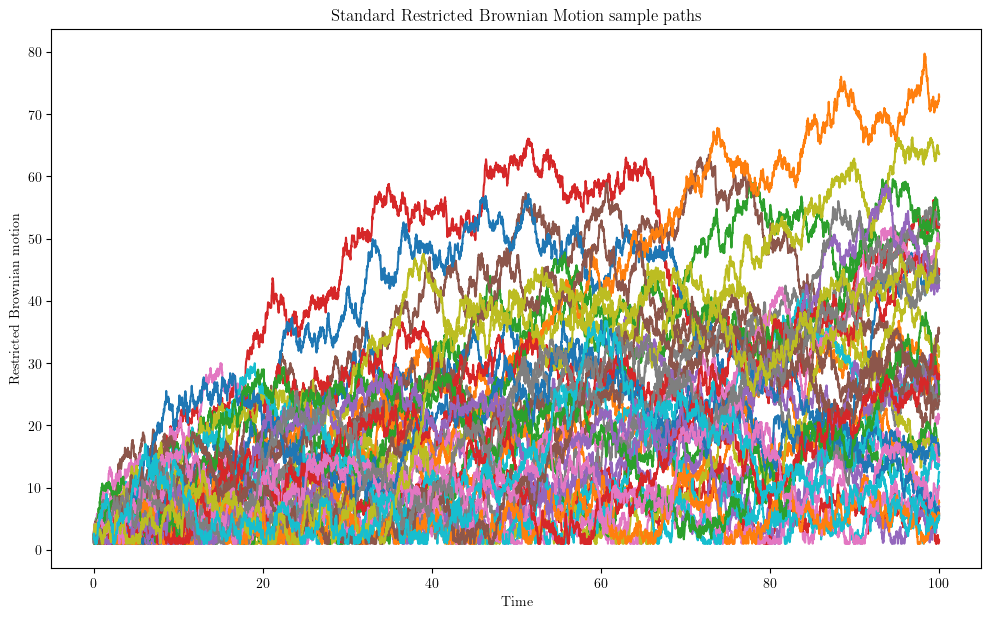

In [11]:
# Restricted Brownian motion samples ----
fig_2, ax_2 = plt.subplots(1, 1, figsize = (12, 7))

for path in range(0, 40):
    df_aux = df_rbm[df_rbm["simulation"] == path]
    ax_2.plot(
        df_aux["time"],
        df_aux["value"],
        alpha = 1,
        zorder = 2,
        marker = "",
        linestyle = "-",
        markersize = 1
    )
ax_2.set_title("Standard Restricted Brownian Motion sample paths")
ax_2.set_xlabel("Time")
ax_2.set_ylabel("Restricted Brownian motion")
plt.show()

# Additional facts of the RBM entropy and its entropy production rate

In [12]:
from scipy.stats import norm # type: ignore

# Estimation of Shannon entropy for the restricted Brownian Motion (RBM) ----
def estimate_shannon_entropy_rbm(t, mu, sigma, x0, t0, x_threshold, amplitude, h):
    """Estimation of Shannon entropy of restricted Brownian motion with an
    amplitude A, a gauge condition of the initial differential entropy h, and
    sigma>0

    Args:
    ---------------------------------------------------------------------------
    t : float or numpy array dtype float
        Arbitrary vector of real values (time)
    mu : float
        Stochastic drift of Brownian motion
    sigma : float
        Difussion coefficient of Brownian motion
    x0 : float
        Initial condition of Brownian motion path
    t0 : float
        Initial time for Brownian motion path
    x_threshold : float
        Threshold value for the support of the probability density function
    amplitude : float
        Amplitude to make the differential entropy an extensive quantity
    h : float
        Gauge condition of the initial differential entropy
    
    Returns:
    ---------------------------------------------------------------------------
    z : float or numpy array dtype float
        Shannon differential entropy of restricted Brownian motion
    """
    # Local variables
    tau = t - t0
    z_v = (x_threshold - x0 - mu * tau) / sigma
    
    factor_1 = np.sqrt(2 * np.pi * np.power(sigma, 2) * tau)
    factor_2 = norm.sf(x = z_v, loc = 0, scale = np.sqrt(tau))    
    factor_3 = 0.5 * z_v * norm.pdf(x = z_v, loc = 0, scale = np.sqrt(tau)) / (factor_2 * np.sqrt(tau))

    # Shannon entropy
    z = h + amplitude * (0.5 + np.log(factor_1) + np.log(factor_2) + factor_3)
    return z

def estimate_epr_rbm(t, mu, sigma, x0, t0, x_threshold, amplitude, h=0):
    """Estimation of Shannon entropy production rate of restricted Brownian
    motion

    Args:
    ---------------------------------------------------------------------------
    t : float or numpy array dtype float
        Arbitrary vector of real values (time)
    mu : float
        Stochastic drift of Brownian motion
    sigma : float
        Difussion coefficient of Brownian motion
    x0 : float
        Initial condition of Brownian motion path
    t0 : float
        Initial time for Brownian motion path
    x_threshold : float
        Threshold value for the support of the probability density function
    amplitude : float
        Amplitude to make the differential entropy an extensive quantity
    h : float
        Gauge condition of the initial production rate of differential entropy
        (default value 0)
    
    Returns:
    ---------------------------------------------------------------------------
    z : float or numpy array dtype float
        Differential Shannon entropy production rate of restricted Brownian
        motion
    """
    # Local variables
    tau = t - t0
    z_v = (x_threshold - x0 - mu * tau) / sigma
    z_s = (x_threshold - x0 + mu * tau) / sigma
    
    factor_1 = norm.sf(x = z_v, loc = 0, scale = np.sqrt(tau))    
    factor_2 = norm.pdf(x = z_v, loc = 0, scale = np.sqrt(tau))
    factor_3 = 0.25 * z_s * factor_2 / (np.power(tau, 1.5) * factor_1)
    factor_4 = 0.25 * z_v * z_s * np.power(factor_2 / (tau * factor_1), 2)
    factor_5 = 0.25 * z_v * factor_2 * (z_v * z_s - tau) / (np.power(tau, 2.5) * factor_1)

    # Shannon entropy production rate
    z = h + amplitude * (0.5 / tau + factor_3 - factor_4 + factor_5)
    print("zv:{}\nzs:{}\nf1:{}\nf2:{}\nf3:{}\nf4:{}\nf5:{}\n z:{}\n".format(z_v, z_s, factor_1, factor_2, factor_3, factor_4, factor_5, z))
    return z

estimate_epr_rbm(np.linspace(0.02, 0.085, 2), mu, sigma, x0, t0, threshold, 1, 0)

zv:[-0.334      -0.33616667]
zs:[-0.33266667 -0.3305    ]
f1:[0.99090522 0.87555346]
f2:[0.17345674 0.70388547]
f3:[-5.14710909 -2.68041731]
f4:[2.12791322 2.48465977]
f5:[-23.54180627  -0.83725641]
 z:[-5.81682858 -0.11998055]



array([-5.81682858, -0.11998055])

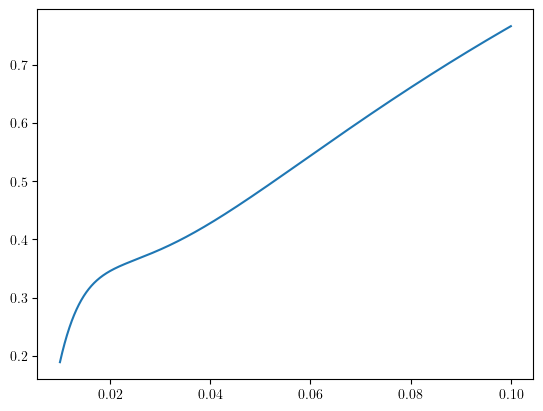

In [13]:
plt.plot(np.logspace(-2,-1,1000), estimate_shannon_entropy_rbm(np.logspace(-2,-1,1000), mu, sigma, x0, t0, threshold, 1, 0))


zv:[-0.33366667 -0.33366744 -0.33366821 -0.33366898 -0.33366975 -0.33367053
 -0.33367131 -0.33367209 -0.33367287 -0.33367365 -0.33367444 -0.33367523
 -0.33367601 -0.33367681 -0.3336776  -0.33367839 -0.33367919 -0.33367999
 -0.33368079 -0.33368159 -0.33368239 -0.3336832  -0.33368401 -0.33368481
 -0.33368563 -0.33368644 -0.33368725 -0.33368807 -0.33368889 -0.33368971
 -0.33369053 -0.33369136 -0.33369218 -0.33369301 -0.33369384 -0.33369467
 -0.33369551 -0.33369634 -0.33369718 -0.33369802 -0.33369886 -0.3336997
 -0.33370055 -0.3337014  -0.33370225 -0.3337031  -0.33370395 -0.33370481
 -0.33370566 -0.33370652 -0.33370738 -0.33370825 -0.33370911 -0.33370998
 -0.33371085 -0.33371172 -0.33371259 -0.33371347 -0.33371434 -0.33371522
 -0.3337161  -0.33371699 -0.33371787 -0.33371876 -0.33371965 -0.33372054
 -0.33372143 -0.33372233 -0.33372323 -0.33372413 -0.33372503 -0.33372593
 -0.33372684 -0.33372775 -0.33372866 -0.33372957 -0.33373048 -0.3337314
 -0.33373232 -0.33373324 -0.33373416 -0.33373509 -

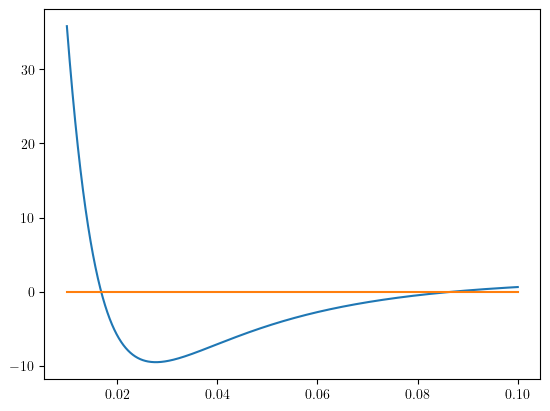

In [14]:
plt.plot(np.logspace(-2,-1,1000), estimate_epr_rbm(np.logspace(-2,-1,1000), mu, sigma, x0, t0, threshold, 1, 0))
plt.plot(np.logspace(-2,-1,1000), np.zeros_like(np.logspace(-2,-1,1000)))